In [1]:
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np 
from tqdm import tqdm
from collections import Counter
import os
import yaml

In [2]:
with open("../../config.yaml", "r") as ymlfile:
    CFG = yaml.load(ymlfile, Loader=yaml.SafeLoader)

In [3]:
splits = ["TRAIN", "VALID", "TEST"]
datasets = []
for split in splits:
    datasets.append(pkl.load(open(os.path.join(CFG["gpudatadir"], f"StringDataset_5exp_delta_no_unk_{split}.pkl"), "rb")))

In [4]:
ind_count = Counter()
modified_ind = Counter()
for i in tqdm(range(len(datasets))):
    for j in datasets[i]["tuples"]:
        ind_count[j["ind_index"]] += 1
        modified_ind[j["ind_index"]] += 1

100%|██████████| 3/3 [00:01<00:00,  1.68it/s]


In [7]:
total_people = sum(ind_count.values())
print(total_people)

3026604


In [10]:
print(ind_count.most_common(3))
modified_ind.pop(63)
modified_ind.pop(83)

[(63, 187801), (83, 168950), (24, 86485)]
1178823


In [12]:
total_people2 = sum([i[1] for i in modified_ind.most_common(20)])
print(total_people2)
tmp = [i[1]*100 / total_people2 for i in modified_ind.most_common(20)]
print(tmp)

1178823
[7.336555191067701, 7.137882447152796, 6.363890083583371, 6.253865084071146, 6.239189428777688, 5.962133416127782, 5.21774685427753, 4.927202811618029, 4.883260676115074, 4.588305453829794, 4.525530974539858, 4.4914291628174885, 4.323889167415294, 4.2841885507832815, 4.0261345426751936, 3.971418949240047, 3.958609562249803, 3.9181454722210205, 3.8195725736603374, 3.7710495977767655]


In [15]:
retained_ind = [i[0] for i in modified_ind.most_common(20)]

In [16]:
with open(os.path.join(CFG["gpudatadir"], "ind_class_dict.pkl"), 'rb') as f:
    ind_dict = pkl.load(f)
sub_ind_dict = {k: ind_dict[i] for k, i in enumerate(retained_ind)}
with open(os.path.join(CFG["gpudatadir"], "20_industry_dict.pkl"), 'wb') as f:
    pkl.dump(sub_ind_dict, f)

In [23]:
ind_map_to_subsampled = {k: i for k, i in enumerate(retained_ind)}
print(ind_map_to_subsampled)
with open(os.path.join(CFG["gpudatadir"], "ind_map_to_subsampled.pkl"), 'wb') as f:
    pkl.dump(ind_map_to_subsampled, f)

{0: 24, 1: 67, 2: 10, 3: 84, 4: 58, 5: 123, 6: 80, 7: 51, 8: 66, 9: 125, 10: 114, 11: 46, 12: 25, 13: 8, 14: 111, 15: 133, 16: 122, 17: 9, 18: 64, 19: 104}


In [17]:
sub_ind_dict

{0: 'Computer Software',
 1: 'Internet',
 2: 'Banking',
 3: 'Mechanical or Industrial Engineering',
 4: 'Human Resources',
 5: 'Research',
 6: 'Management Consulting',
 7: 'Government Administration',
 8: 'International Trade and Development',
 9: 'Retail',
 10: 'Public Relations and Communications',
 11: 'Food Production',
 12: 'Construction',
 13: 'Automotive',
 14: 'Professional Training & Coaching',
 15: 'Telecommunications',
 16: 'Renewables & Environment',
 17: 'Aviation & Aerospace',
 18: 'Insurance',
 19: 'Pharmaceuticals'}

In [51]:
for i in retained_ind:
    print(ind_dict[83])

Marketing and Advertising
Marketing and Advertising
Marketing and Advertising
Marketing and Advertising
Marketing and Advertising
Marketing and Advertising
Marketing and Advertising
Marketing and Advertising
Marketing and Advertising
Marketing and Advertising
Marketing and Advertising
Marketing and Advertising
Marketing and Advertising
Marketing and Advertising
Marketing and Advertising
Marketing and Advertising
Marketing and Advertising
Marketing and Advertising
Marketing and Advertising
Marketing and Advertising


In [46]:

sub_ind_dict

{0: 'Computer Software',
 1: 'Internet',
 2: 'Banking',
 3: 'Mechanical or Industrial Engineering',
 4: 'Human Resources',
 5: 'Research',
 6: 'Management Consulting',
 7: 'Government Administration',
 8: 'International Trade and Development',
 9: 'Retail',
 10: 'Public Relations and Communications',
 11: 'Food Production',
 12: 'Construction',
 13: 'Automotive',
 14: 'Professional Training & Coaching',
 15: 'Telecommunications',
 16: 'Renewables & Environment',
 17: 'Aviation & Aerospace',
 18: 'Insurance',
 19: 'Pharmaceuticals'}

In [53]:
sub_ind_dict = {k: ind_dict[i] for k, i in enumerate(retained_ind)}
with open(os.path.join(CFG["gpudatadir"], "20_industry_dict.pkl"), 'wb') as f:
    pkl.dump(sub_ind_dict, f)

In [13]:
tmp = pkl.load(open("/local/gainondefor/work/data/class_weights_dict_delta_5exp_dynamics.pkl", 'rb'))
with open("/local/gainondefor/work/data/ind_class_dict.pkl", 'rb') as f_name:
    industry_dict = pkl.load(f_name)

In [7]:
repartition = [i for i in tmp["ind"].values()]

<BarContainer object of 147 artists>

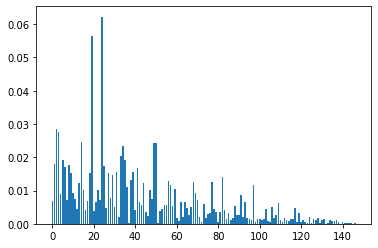

In [10]:
plt.bar(range(len(repartition)), repartition)


In [26]:
for i in np.argsort(repartition)[::-1][:10]:
    print(industry_dict[i])
    print(repartition[i]*100)

Computer Software
6.222300268801963
Commercial Real Estate
5.631244223345091
Alternative Dispute Resolution
2.856578216526779
Alternative Medicine
2.771583289248637
Business Supplies and Equipment
2.4476777503207954
Gambling & Casinos
2.4303925125194117
Glass, Ceramics & Concrete
2.4210342627543313
Education Management
2.340883605942819
E-Learning
2.03481379009666
Electrical/Electronic Manufacturing
1.9138721740150029


In [25]:
for i in np.argsort(repartition)[:20]:
    print(industry_dict[i])
    print(repartition[i]*100)

Supermarkets
0.0037432999060321623
Wireless
0.004734173410570089
Utilities
0.008862813012811444
Warehousing
0.010239026213558563
Telecommunications
0.010349123269618331
Writing and Editing
0.012991452615052801
Wine and Spirits
0.015193393736248189
Sporting Goods
0.01656960693699531
Research
0.018166014249861966
Government Administration
0.021468925931655048
Veterinary
0.02157902298771482
Wholesale
0.026753584622523984
Retail
0.030386787472496377
Environmental Services
0.03324931093005039
Management Consulting
0.03946979459742737
Renewables & Environment
0.04756192821782042
Law Practice
0.05020425756325489
Venture Capital & Private Equity
0.05020425756325489
Transportation/Trucking/Railroad
0.05356221777307786
Ranching
0.054938430973824975


In [27]:
len([i for i in repartition if i >0.001])

118

In [28]:
new_ind_dict = {}

In [ ]:
for k, v in industry_dict.items()